## EDA of cadiovascular diseases data

This work is by Svetlana Ulianova (with modifications by Ortal Dayan), https://www.kaggle.com/sulianova/eda-cardiovascular-data

The dataset consists of 70,000 records of patients data with 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD).

#### Data description

There are 3 types of input features:

- Objective: factual information
- Examination: results of medical examination
- Subjective: information given by the patient

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


### Initial analysis
Let's look at the dataset

In [4]:
os.getcwd()

'c:\\Users\\barc\\Dropbox (Weizmann Institute)\\MSc_Weizmann\\FGS_ML\\Python Code -20231218\\EDA\\eda-medical-example-binary-classification'

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

path_to_data = os.getcwd()
df = pd.read_csv(path_to_data + "//cardio-vascular-disease.csv",sep=";")


In [18]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Changing the names of the attributes ap_hi -> sbp, ap_io ->dbp, cardio -> cvd

And transforming the age column from in days to age_in_years

In [19]:
df.rename(columns={'ap_hi': 'sbp', 'ap_lo': 'dbp', 'cardio': 'cvd'}, inplace=True)

df['age_in_years'] = (df['age'] / 365).round().astype('int')
df.drop('age', axis = 1, inplace=True)
print(df.columns)

df.head()

Index(['id', 'gender', 'height', 'weight', 'sbp', 'dbp', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cvd', 'age_in_years'],
      dtype='object')


,id,gender,height,weight,sbp,dbp,cholesterol,gluc,smoke,alco,active,cvd,age_in_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48


#### Univariate Analysis (visualizing single variables)
We atart with looking at the attributes' datatypes and number of missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            70000 non-null  int64  
 1   gender        70000 non-null  int64  
 2   height        70000 non-null  int64  
 3   weight        70000 non-null  float64
 4   sbp           70000 non-null  int64  
 5   dbp           70000 non-null  int64  
 6   cholesterol   70000 non-null  int64  
 7   gluc          70000 non-null  int64  
 8   smoke         70000 non-null  int64  
 9   alco          70000 non-null  int64  
 10  active        70000 non-null  int64  
 11  cvd           70000 non-null  int64  
 12  age_in_years  70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 float (weight).

There are no missing values.

There are 70,000 observations in the dataset.

<br>

We can use `describe()` to display statistics for each attribute:

In [ ]:
df.describe()

,id,gender,height,weight,sbp,dbp,cholesterol,gluc,smoke,alco,active,cvd,age_in_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Looking at the max and min values in the table above,
we can see that there are outliers in `sbp`, `dsp`, `weight` and `height`. We will deal with them later.

<br>

Scatter plots and box plots are relatively simple ways for detecting potential outliers. <br>
In boxplots potential outliers are the points beyond the whiskers: (df[col] <= Q1 - 1.5 * IQR) | (df[col] >= Q3 + 1.5 *IQR)

You can read on how to find and remove outliers on [ML Mastery](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

Note: before we remove any potential outliers we need to make sure that they are indeed non valid values which we can discard either based on domain knowledge or understanding of how the data was collected (e.g. due to some measurement errors).

Let's plot boxplots of the features with outliers and print the unique values in each one of them:

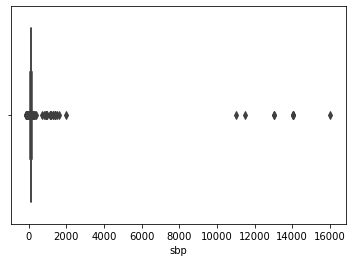

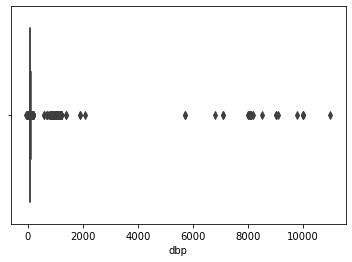

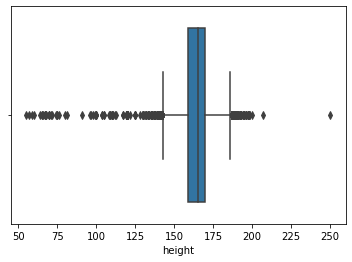

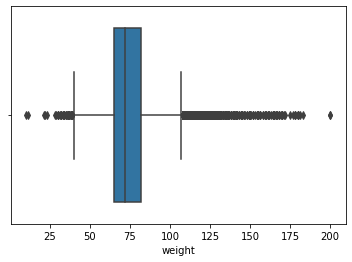

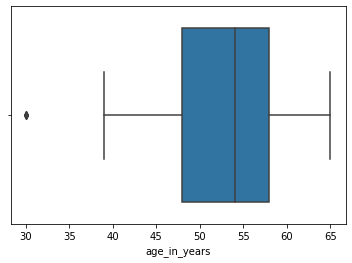

sbp 3134 [ -150  -140  -120  -115  -100     1     7    10    11    12    13    14
    15    16    17    20    24    60    70    80    85    90   170   171
   172   173   174   175   176   177   178   179   180   181   184   185
   187   188   190   191   193   195   196   197   199   200   202   207
   210   215   220   230   240   309   401   701   806   902   906   907
   909   960  1110  1130  1202  1205  1300  1400  1409  1420  1500  1620
  2000 11020 11500 13010 14020 16020]
dbp 4730 [  -70     0     1     6     7     8     9    10    15    20    30    40
    45    49    50    52    53    54    55    56    57    58    59    60
    61    62    63    64    65   105   106   107   108   109   110   111
   112   113   114   115   118   119   120   121   122   125   126   130
   135   140   150   160   170   180   182   190   585   602   700   708
   709   710   800   801   802   809   810   820   850   870   880   900
   901   902   910  1000  1001  1002  1003  1007  1008  1011  1022  

In [ ]:
dict_outliers = {}

def boxplot_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    outliers_bool = (df[col] <= Q1 - 1.5 * IQR) | (df[col] >= Q3 + 1.5 *IQR)
    return df[col][outliers_bool]

for col in ['sbp', 'dbp', 'height', 'weight', 'age_in_years']:
    dict_outliers.update({col : boxplot_outliers(col)})


# Creating individual plots
cols = ['sbp', 'dbp', 'height', 'weight', 'age_in_years']
for var in cols:
    sns.boxplot(x=var, data=df)
    plt.show()


for key, value in dict_outliers.items() :
    print (key, len(value), np.unique(value))


We will deal with the outliers in the Cleaning Data section below

Let's look at the numerical features and how are they spread among the target class cvd.

We will start with the age feature.
We will create a countplot to vizualise for example at what age does the number of people with CVD exceed the number of people without CVD?


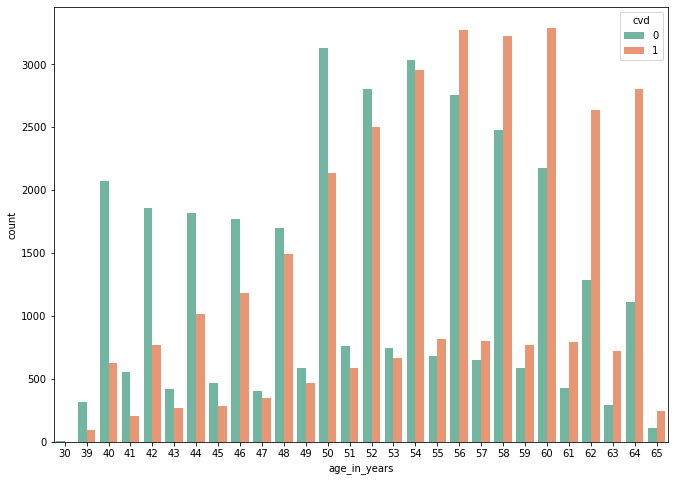

In [ ]:
from matplotlib import rcParams # rcParams - contains the default styles for every plot element you create.
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age_in_years', hue='cvd', data = df, palette="Set2");

It can be observed that over the age of 55 there are more people diagnosed with CVD than with absense of it.

Let's look at categorical variables in the dataset and their distribution:

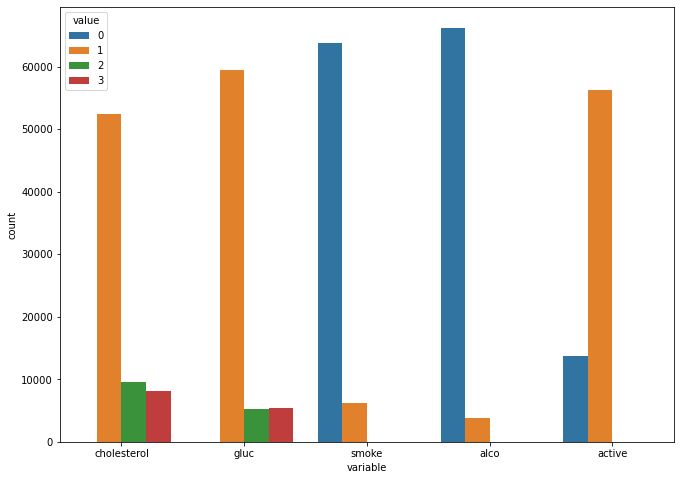

In [ ]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

We see that some categoroes have substantialy more observations

#### Bivariate analysis (combining 2 variables into a single plot)

It may be useful to split categorical variables by target class:

        cvd     variable  value
0         0  cholesterol      1
1         1  cholesterol      3
2         1  cholesterol      3
3         1  cholesterol      1
4         0  cholesterol      1
...     ...          ...    ...
349995    0       active      1
349996    1       active      1
349997    1       active      0
349998    1       active      0
349999    0       active      1

[350000 rows x 3 columns]


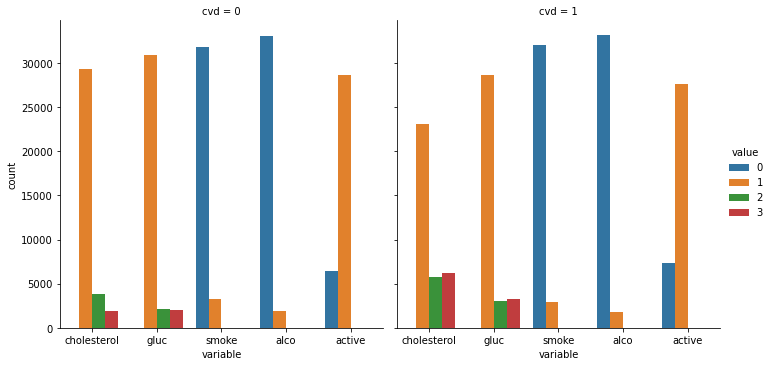

In [ ]:
df_long = pd.melt(df, id_vars=['cvd'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
print(df_long)
# sns.catplot() - provides access to several axes-level functions that show the relationship between a
#numerical and one or more categorical variables using one of several visual representations.
#The kind parameter selects the underlying axes-level function to use
sns.catplot(x="variable", hue="value", col="cvd", data=df_long, kind="count");



It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level (higher green (above normal)and red (well above normal)) labeled categories. And, that there are more non active patients with CVD than without CVD.

Looking at the mean height per gender:

In [ ]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women.
<br> Let's see how many men and women are in the dataset:

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Who more often report consuming alcohol - men or women?

In [ ]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

So, men consume alcohol more frequently on average.
<br>

Next, we look at the target class categories porpotions (of diagnosed with CVD  and diagnosed without):`

In [ ]:
print(df['cvd'].value_counts())
df['cvd'].value_counts(normalize=True)

0    35021
1    34979
Name: cvd, dtype: int64


0    0.5003
1    0.4997
Name: cvd, dtype: float64

The target attribute CVD is balanced (the porpotions of each one of the two possible values are very close).

To see how the target class is distributed among men and women, we can use also `crosstab`

In [ ]:
pd.crosstab(df['cvd'],df['gender'] ,normalize=True)

# Compute a simple cross tabulation of two (or more) factors.
# By default computes a frequency table of the factors unless an array of values
# and an aggregation function are passed.

gender,1,2
cvd,,
0,0.327343,0.172957
1,0.323086,0.176614


### Cleaning The Data

In [ ]:
df.describe()

,id,gender,height,weight,sbp,dbp,cholesterol,gluc,smoke,alco,active,cvd,age_in_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


If we look more closely at the height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 30 years.
On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant,
when generilizing data. We deal with these errors (outliers) by removing them.

Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range (using the interquartile range method won't remove the outliers in this dataset):

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

Blood pressure ranges:
<br> Normal:  Systolic - less than 120 mm Hg, Diastolic - less than 80 mm Hg<br>
At Risk (prehypertension):	Systolic - 120–139 mm Hg, Diastolic - 80–89 mm Hg<br>
High Blood Pressure (hypertension):  Systolic - 140 mm Hg or higher, Diastolic: 90 mm Hg or higher

<br>
In cases where diastolic pressure is higher than systolic it is incorrect. <br>
How many records are inaccurate in terms of 'dbp'>'sbp' blood pressure?

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['dbp']> df['sbp']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers:

In [ ]:
df.drop(df[(df['sbp'] > df['sbp'].quantile(0.975)) | (df['sbp'] < df['sbp'].quantile(0.025))].index, inplace=True)
df.drop(df[(df['dbp'] > df['dbp'].quantile(0.975)) | (df['dbp'] < df['dbp'].quantile(0.025))].index, inplace=True)

Let's see if we manged to get rid of all observations where diastolic was higher than systolic:

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['dbp']> df['sbp']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


Lets plot boxplots of the diastolic and systolic blood pressure values without the outliers:

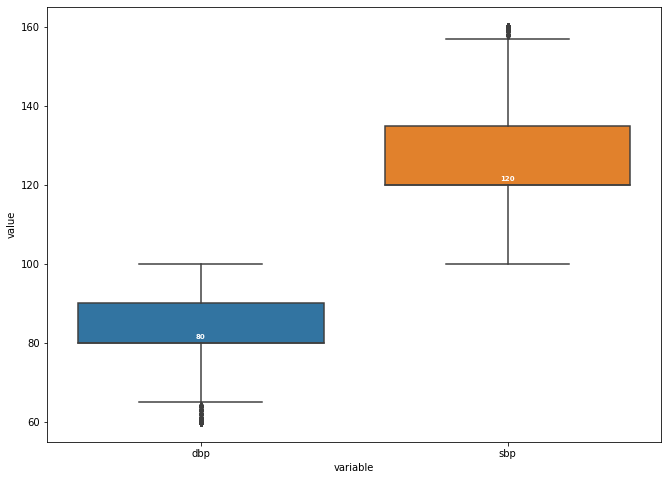

In [ ]:
blood_pressure = df[['dbp','sbp']]
df_bp_molten = blood_pressure.melt()

box_plot = sns.boxplot(x='variable', y='value',data=df_bp_molten)


# drawing medians
medians = df_bp_molten.groupby(['variable'])['value'].median()
vertical_offset = df_bp_molten['value'].median() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
            horizontalalignment='center',size='x-small',color='w',weight='semibold')


Its good to see that all systoilic blood pressure values are above the diastolic values

#### Multivariate analysis (combining 3 or more variables into a single plot)
It might be useful to consider correalation matrix:

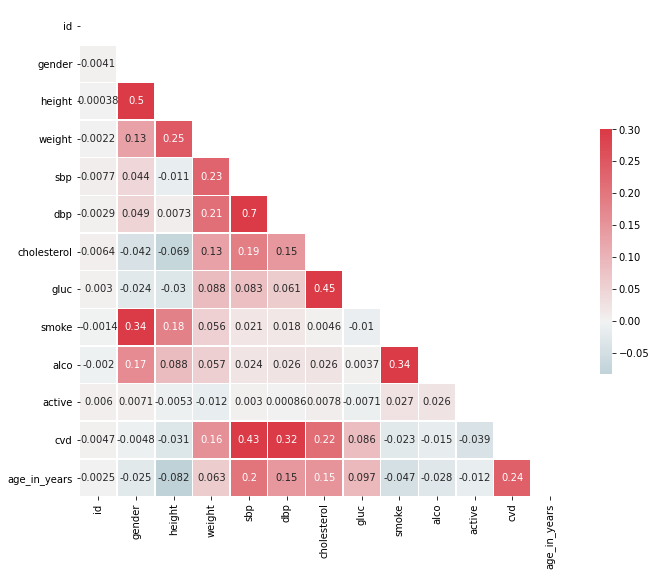

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True) # In sns.heatmap it will be the mapping from data values to color space
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr.

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, # mask -If passed, data will not be shown in cells where mask is True. vmax and center are for setting the colormap values
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

As we can see sbp, dbp, age and cholesterol have significant impact, but not very high correlation with the cvd target class.

In general: strong corrolation values are between 0.7 and 1, moderate between 0.3 and 0.7 and weak 0 and 0.3.

Let's create a new feature - Body Mass Index (BMI):

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

and compare average BMI for healthy people to average BMI of ill people.
<br>Normal BMI values are said to be from 18.5 to 25.

Guidelines for comparing boxplots (https://www.open.edu/openlearn/mod/oucontent/view.php?printable=1&id=4089):

- Compare the respective medians, to compare location.

- Compare the interquartile ranges (that is, the box lengths), to compare dispersion.

- Look at the overall spread as shown by the adjacent values (this is another aspect of dispersion)

- Look for signs of skewness. If the data do not appear to be symmetric, does each batch show the same kind of asymmetry?

- Look for potential outliers.

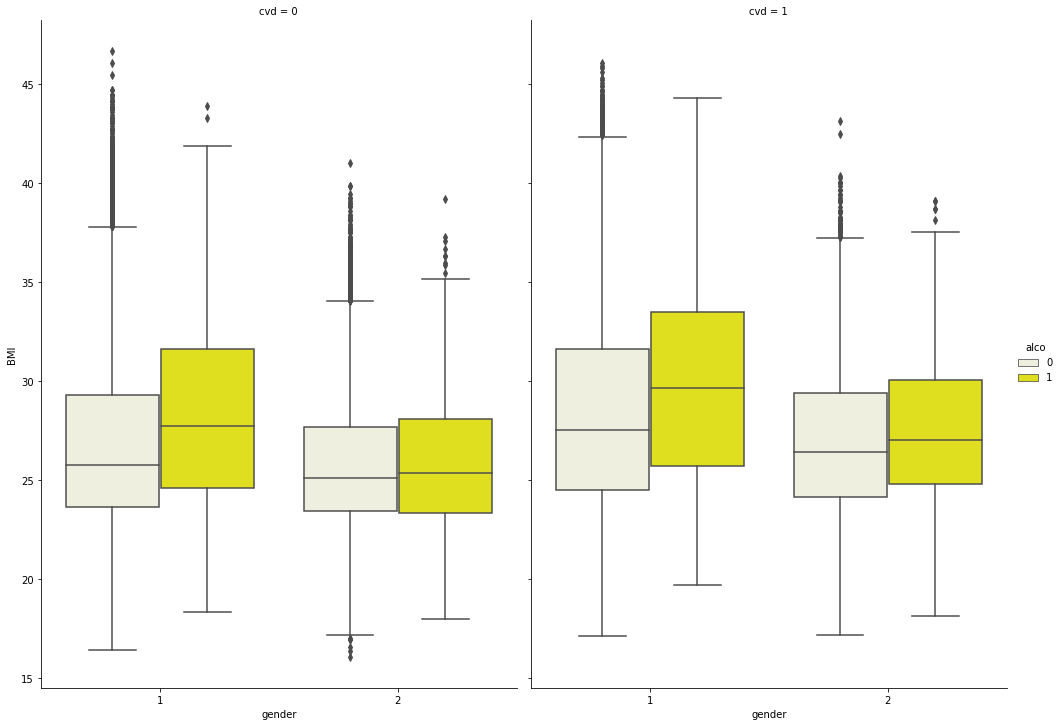

In [ ]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cvd", data=df, color = "yellow", kind="box", height=10, aspect=.7);

 Conclusion: Drinking women have higher risks for CVD than drinking men based on thier BMI.